![alt text](https://veja.abril.com.br/wp-content/uploads/2022/07/warner-bros-friends-1.jpg?quality=90&strip=info&w=1280&h=720&crop=1)
# The.One.With.The.Data

### Prepping Collab

To save data on Google Drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/data")

Mounted at /content/drive


## Getting the Data
We will be scraping the dataset from - https://pandawhocodes.github.io/friends/

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
friends = ("Ross","Rachel","Monica","Chandler","Joey","Phoebe")

In [ ]:
def get_all_seasons(link="https://pandawhocodes.github.io/friends/"):
  """
  Get all seasons and episodes
  :param soup: Beautiful Soup object
  """
  soup = BeautifulSoup(requests.get(link).content,"html.parser")
  seasons = soup.findAll("div", {"class": "season"})
  return seasons


def get_episode_links(season):
  """
  returns a list of episode links
  """
  soup = BeautifulSoup(season,"html.parser")
  episodes = []
  for link in soup.find_all('a',href=True):
    episodes.append(link["href"])
  return episodes


def get_episode_dialogues(episode_link):
  soup = BeautifulSoup(requests.get(episode_link).content,"html.parser")
  return soup.findAll("p")[2:]

In [ ]:
def r_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def get_line(line):
  """ returns the line and the friends actor"""
  c = line.find(":")
  actor = line[:c]
  line = line[c+1:]
  return [actor,line]

In [ ]:
def get_episode_data(link):
  """
  formats the episode into json format
  """
  episode = get_episode_dialogues(link)
  episode_data = {}
  for line in episode:
    line = r_html(line.text)
    if line.startswith(friends):
      actor,line = get_line(line)
      if actor in episode_data:
        episode_data[actor].append(line)
      else:
        episode_data[actor] = []
        episode_data[actor].append(line)
  return episode_data

In [ ]:
friends_data = {}
seasons =  get_all_seasons()
for count,season in enumerate(seasons):
  print("Getting Season:",count+1)
  episodes = get_episode_links(str(season))
  for count2,episode in enumerate(episodes):
    print("Getting episode",count2+1)
    link = "https://pandawhocodes.github.io/friends/"+ episode
    data = get_episode_data(link)
    episode_name = re.findall(r"(\d*.*).html",episode)[0]
    friends_data[episode_name] = data

Getting Season: 1
Getting episode 1
Getting episode 2
Getting episode 3
Getting episode 4
Getting episode 5
Getting episode 6
Getting episode 7
Getting episode 8
Getting episode 9
Getting episode 10
Getting episode 11
Getting episode 12
Getting episode 13
Getting episode 14
Getting episode 15
Getting episode 16
Getting episode 17
Getting episode 18
Getting episode 19
Getting episode 20
Getting episode 21
Getting episode 22
Getting episode 23
Getting episode 24
Getting Season: 2
Getting episode 1
Getting episode 2
Getting episode 3
Getting episode 4
Getting episode 5
Getting episode 6
Getting episode 7
Getting episode 8
Getting episode 9
Getting episode 10
Getting episode 11
Getting episode 12
Getting episode 13
Getting episode 14
Getting episode 15
Getting episode 16
Getting episode 17
Getting episode 18
Getting episode 19
Getting episode 20
Getting episode 21
Getting episode 22
Getting episode 23
Getting Season: 3
Getting episode 1
Getting episode 2
Getting episode 3
Getting episode 4

In [ ]:
friends_lines = {}
for friend in friends:
  friends_lines[friend] = []

count = 0
for episode in friends_data:
  for friend in friends_data[episode]:
    friend = friend.strip()
    try:
      friends_lines[friend].extend(friends_data[episode][friend])
    except Exception as e:
      count += 1
      print(friend,e)


Phoebe, Ross, Chandler, and Joey 'Phoebe, Ross, Chandler, and Joey'
Ross and Rachel 'Ross and Rachel'
Chandler and Joey 'Chandler and Joey'
Monica and Phoebe 'Monica and Phoebe'
Monica, Joey, and Phoebe 'Monica, Joey, and Phoebe'
Monica and Phoebe 'Monica and Phoebe'
Joey, Chandler, and Ross 'Joey, Chandler, and Ross'
Phoebe's Assistant "Phoebe's Assistant"
Joey and Chandler 'Joey and Chandler'
Rachel and Phoebe 'Rachel and Phoebe'
Rachel and Phoebe 'Rachel and Phoebe'
Chandle 'Chandle'
Joe 'Joe'
Chandler and Joe 'Chandler and Joe'
Ros 'Ros'
Rache 'Rache'
Phoeb 'Phoeb'
Monic 'Monic'
Ross and Susa 'Ross and Susa'
Rachel and Chandle 'Rachel and Chandle'
Monica and Rache 'Monica and Rache'
Chandler and Joey 'Chandler and Joey'
Rachel (as Monica) 'Rachel (as Monica)'
Monica (as Rachel) 'Monica (as Rachel)'
Phoebe's Friends "Phoebe's Friends"
Rachel and Monica 'Rachel and Monica'
Ross and Chandler 'Ross and Chandler'
Chandler and Ross 'Chandler and Ross'
Phoebe and Rachel 'Phoebe and Rachel

In [ ]:
count

300

In [ ]:
line_counts = {}
for friend in friends_lines:
  line_counts[friend] = len(friends_lines[friend])
line_counts

{'Ross': 8192,
 'Rachel': 8343,
 'Monica': 7507,
 'Chandler': 7509,
 'Joey': 7401,
 'Phoebe': 6742}

In [ ]:
line_counts.items()

dict_items([('Ross', 8192), ('Rachel', 8343), ('Monica', 7507), ('Chandler', 7509), ('Joey', 7401), ('Phoebe', 6742)])

In [ ]:
import pandas as pd
def dict_to_df(d,columns=[]):
    df=pd.DataFrame(list(d.items()),columns=columns)
    # df.set_index(0, inplace=True)
    return df


In [ ]:
line_counts_df = dict_to_df(line_counts,["Character","Line Count"])
line_counts_df

,Character,Line Count
0,Ross,8192
1,Rachel,8343
2,Monica,7507
3,Chandler,7509
4,Joey,7401
5,Phoebe,6742


<Axes: xlabel='Character'>

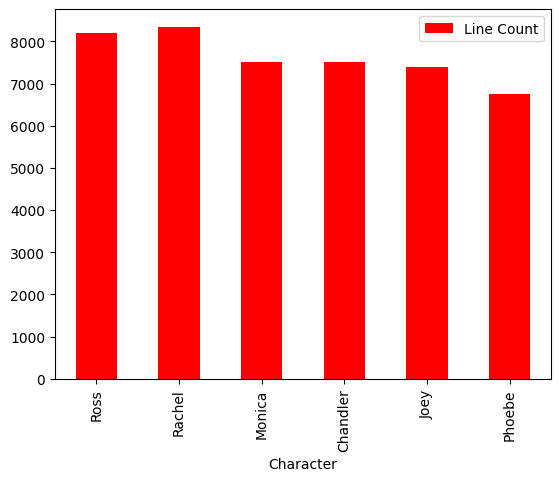

In [ ]:
line_counts_df.plot.bar(color='red',x="Character",y="Line Count")

<Axes: xlabel='Character'>

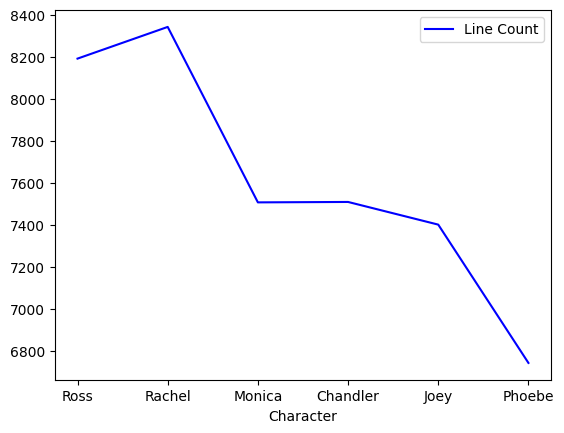

In [ ]:
line_counts_df.plot(kind="line",color="blue",x="Character",y="Line Count")

In [ ]:
joey = friends_lines["Joey"]

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
def cloud(text,feq=False):
  if feq:
    wordcloud = WordCloud()
    wordcloud = wordcloud.generate_from_frequencies(text)
  else:
    wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white",width=800, height=400).generate(text)
  plt.figure(figsize=(20,10) )
  plt.imshow(wordcloud , interpolation="bilinear")
  plt.axis("off")
  plt.show()

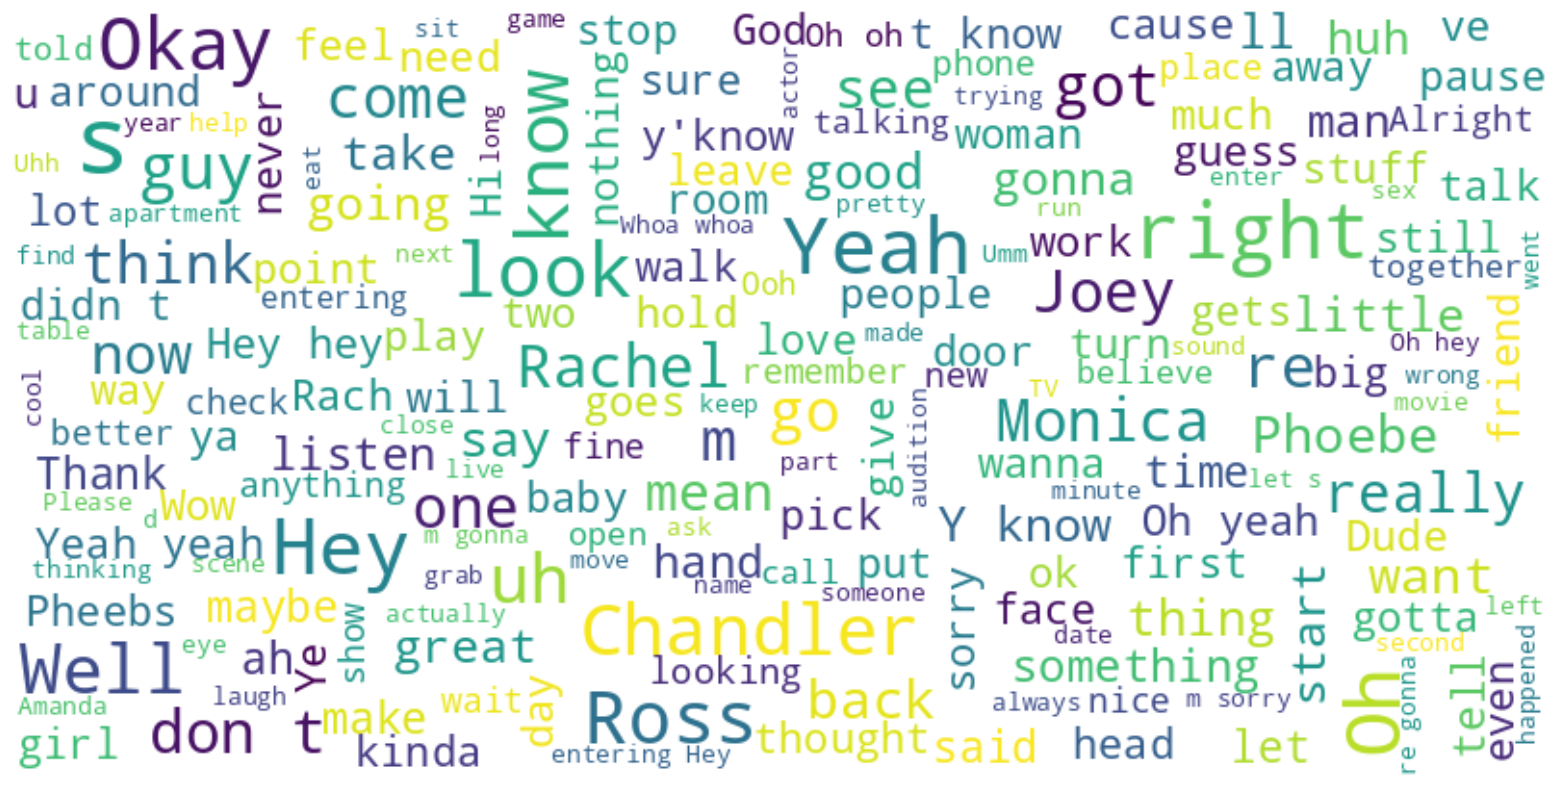

In [ ]:
text = " ".join(joey)
cloud(text)

In [ ]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [ '_'.join(grams) for grams in n_grams]

def gramfreq(text,n,num=100):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

In [ ]:
gm = gramfreq(text.lower(),3)

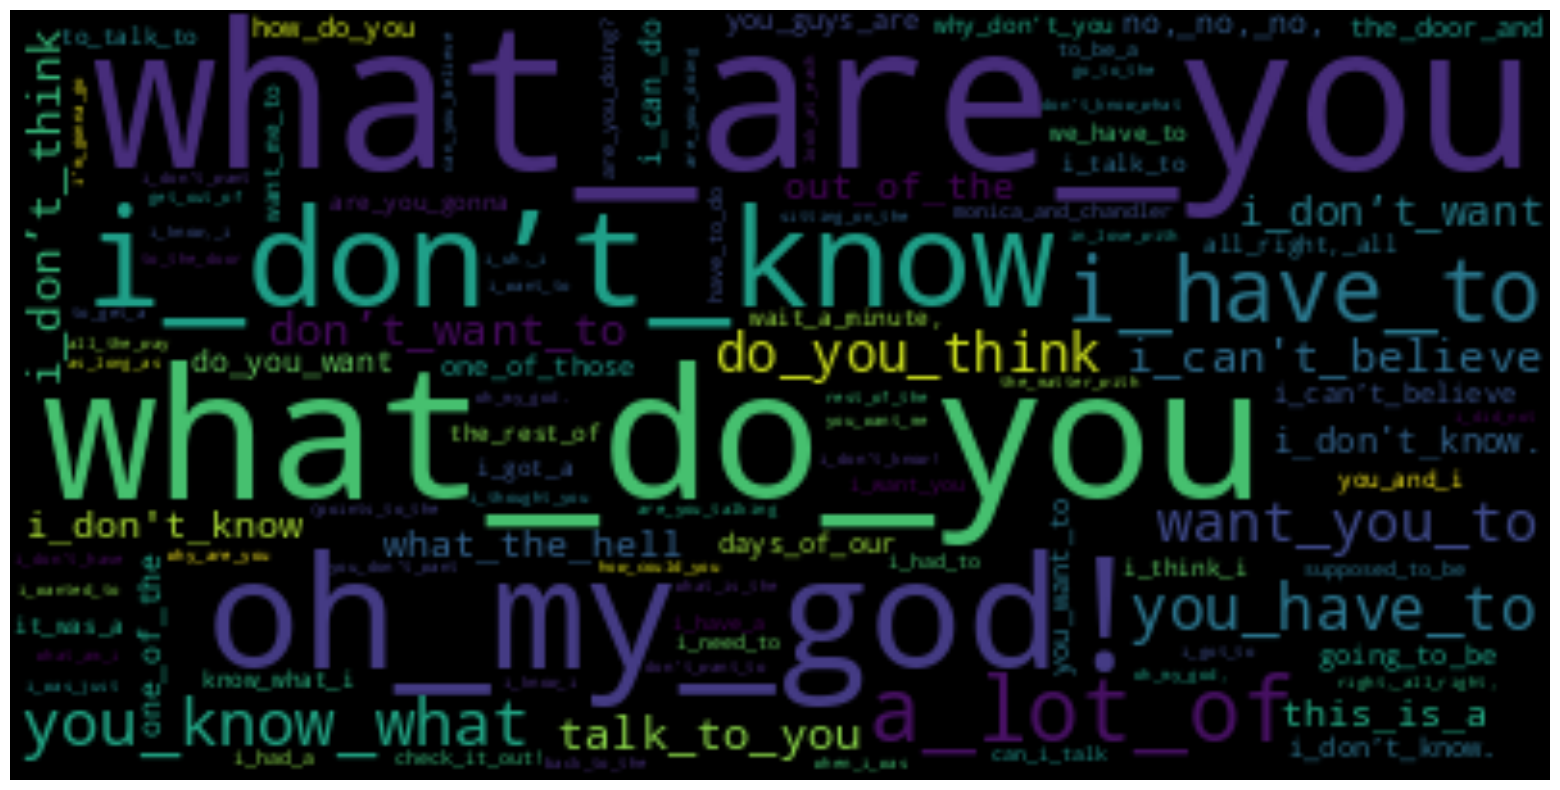

In [ ]:
frequencies = {}
for words,s in gm.iterrows():
  frequencies[words] = s["frequency"]
# cloud(,True)
cloud(frequencies,True)

# Let's do some rudimentary sentiment Analysis

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
joey = friends_lines["Joey"]

sentiments = []
for line in joey:
  blob  = TextBlob(line)
  if blob.sentiment.polarity != 0.0:
    sentiments.append(blob.sentiment.polarity)

In [ ]:
senti_pd = pd.DataFrame(sentiments,columns=["sentiment"])

In [ ]:
senti_pd.describe()

,sentiment
count,3459.000000
mean,0.165743
std,0.391610
min,-1.000000
25%,-0.094709
50%,0.208333
75%,0.437500
max,1.000000


In [ ]:
Chandler = friends_lines["Chandler"]

sentiments = []
for line in Chandler:
  blob  = TextBlob(line)
  if blob.sentiment.polarity != 0.0:
    sentiments.append(blob.sentiment.polarity)
senti_pd_Chandler = pd.DataFrame(sentiments,columns=["sentiment"])
senti_pd_Chandler.describe()

,sentiment
count,3559.000000
mean,0.176095
std,0.396078
min,-1.000000
25%,-0.073214
50%,0.228788
75%,0.500000
max,1.000000


# Assignment
Do the same for another TV series or movie script that you can find online and scrape.

In [ ]:
#Example - Big bang theory
def get_episode(link="https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/"):
  page = requests.get(link).content
  soup = BeautifulSoup(page,"lxml")
  main_div = soup.findAll("div",{"class":"entrytext"})[0]
  soup2 = BeautifulSoup(str(main_div),"lxml")
  all_ps = soup2.findAll("p")
  return all_ps
for line in get_episode():
  print(line.text)

Scene: A corridor at a sperm bank.
Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.
Leonard: Agreed, what’s your point?
Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt. 
Leonard: Excuse me?
Receptionist: Hang on. 
Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti. 
Receptionist: Can I help you?
Leonard: Yes. Um, is this the High IQ sperm bank?
Receptionist: If you have to ask, maybe you shouldn’t be here.
Sheldon: I think this is the place.
Receptionist: Fill these out.
Leonard: Thank-you. We’ll be right back.
Receptionist: Oh, take your time. I’ll jus